In [2]:
!pip install vaderSentiment

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from scipy import stats
from datetime import datetime

from nltk.corpus import stopwords

In [17]:
data_path = "X data.csv"   # change if needed
df = pd.read_csv(data_path, encoding='utf-8', low_memory=False)

print(" Dataset Loaded Successfully")
print("Shape:", df.shape)
df.head()

 Dataset Loaded Successfully
Shape: (162980, 2)


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [22]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)           # removing URLs
    text = re.sub(r"@\w+", "", text)              # removing mentions
    text = re.sub(r"#", "", text)                 # removing hashtags symbol
    text = re.sub(r"[^a-z\s]", "", text)          # keeping alphabets only
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['clean_text'] = df.iloc[:, 0].apply(clean_text)   
df = df[df['clean_text'] != ""].reset_index(drop=True)

print(" Text Cleaning Done")
df[['clean_text']].head()

 Text Cleaning Done


,clean_text
0,when modi promised minimum government maximum ...
1,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp to...
3,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...


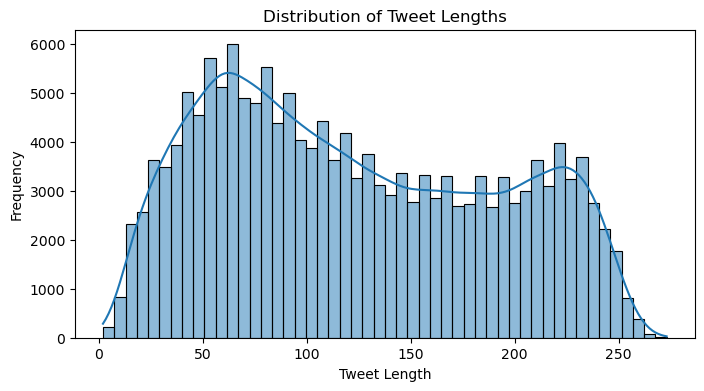

Average Tweet Length: 122.33
Median Tweet Length: 112.0


In [23]:
df['text_length'] = df['clean_text'].apply(len)
plt.figure(figsize=(8,4))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.show()

print("Average Tweet Length:", round(df['text_length'].mean(), 2))
print("Median Tweet Length:", round(df['text_length'].median(), 2))

In [24]:
analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['clean_text'].apply(get_vader_sentiment)
df['Compound_Score'] = df['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

print(" Sentiment Analysis Complete")
df[['clean_text', 'Sentiment', 'Compound_Score']].head(10)

 Sentiment Analysis Complete


,clean_text,Sentiment,Compound_Score
0,when modi promised minimum government maximum ...,Positive,0.5267
1,talk all the nonsense and continue all the dra...,Negative,-0.4019
2,what did just say vote for modi welcome bjp to...,Positive,0.7096
3,asking his supporters prefix chowkidar their n...,Negative,-0.0713
4,answer who among these the most powerful world...,Positive,0.4754
5,kiya tho refresh maarkefir comment karo,Neutral,0.0000
6,surat women perform yagna seeks divine grace f...,Positive,0.7506
7,this comes from cabinet which has scholars lik...,Positive,0.3612
8,with upcoming election india saga going import...,Positive,0.2023
9,gandhi was gay does modi,Neutral,0.0000


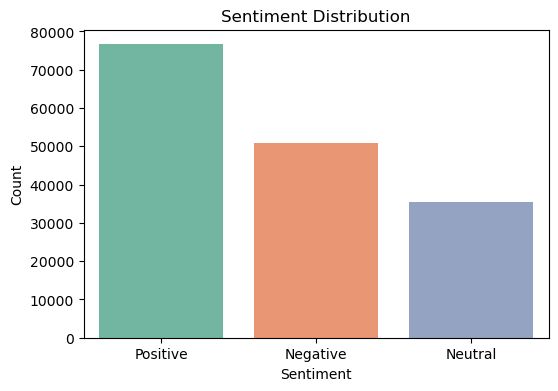

Positive: 76632
Negative: 50842
Neutral: 35499


In [25]:
sentiment_counts = df['Sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

plt.figure(figsize=(6,4))
sns.barplot(x='Sentiment', y='Count', data=sentiment_counts, palette='Set2')
plt.title("Sentiment Distribution")
plt.show()

for s, c in zip(sentiment_counts['Sentiment'], sentiment_counts['Count']):
    print(f"{s}: {c}")

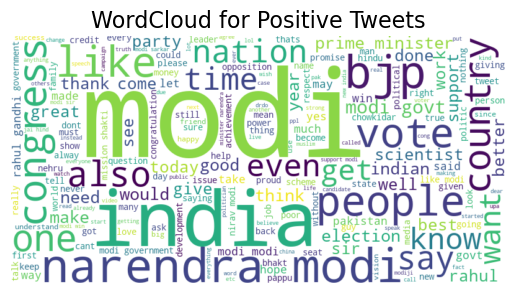

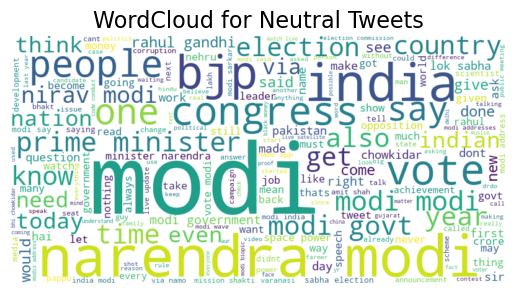

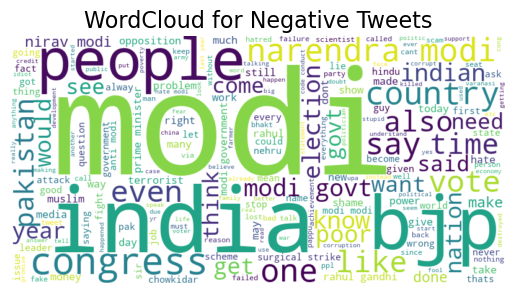

In [26]:
stop_words = set(stopwords.words('english'))

def show_wordcloud(sentiment):
    text = " ".join(df[df['Sentiment'] == sentiment]['clean_text'])
    wc = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud for {sentiment} Tweets", fontsize=16)
    plt.show()

for s in ['Positive', 'Neutral', 'Negative']:
    show_wordcloud(s)

In [27]:
pos = df[df['Sentiment'] == 'Positive'].shape[0]
neg = df[df['Sentiment'] == 'Negative'].shape[0]
neu = df[df['Sentiment'] == 'Neutral'].shape[0]

chi2, p, dof, expected = stats.chi2_contingency([[pos, neg, neu]])
print("Chi-square Test Results")
print(f"Chi2 Statistic: {chi2:.3f}, p-value: {p:.4f}")

Chi-square Test Results
Chi2 Statistic: 0.000, p-value: 1.0000


C:\Users\REA\AppData\Local\Temp\ipykernel_8592\1530450831.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=text_df, palette='coolwarm')


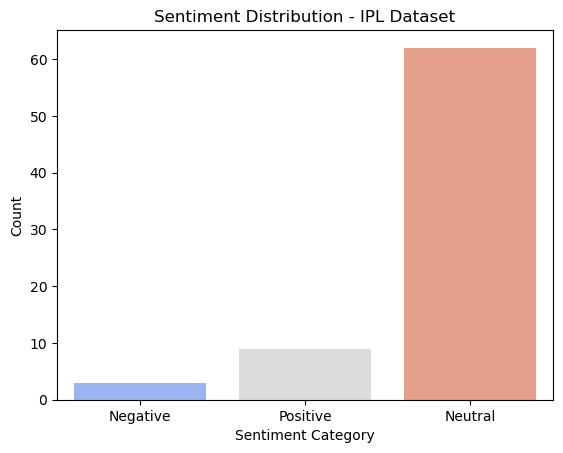


 Task 2 Sentiment Analysis Completed Successfully!


In [14]:
sns.countplot(x='sentiment', data=text_df, palette='coolwarm')
plt.title('Sentiment Distribution - IPL Dataset')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()
print("\n Task 2 Sentiment Analysis Completed Successfully!")